##### Reading video files with OpenCV

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import cv2 as cv

In [2]:
file = './videos/news.mpg'

In [3]:
def get_video_info(file):
    count = 0
    cap = cv.VideoCapture(file)
    width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
    while(cap.isOpened()):
        ret, _ = cap.read()
        if ret:
            count += 1
        else:
            cap.release()
            break

    return (count, height, width)


In [4]:
def get_frames(file, shape):
    frames = np.empty(shape, dtype='uint8')
    index = 0

    cap = cv.VideoCapture(file)
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret:
            frames[index] = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
            index += 1
        else:
            cap.release()
            break

    return frames


In [5]:
shape = get_video_info(file)
frames = get_frames(file, shape)

[mpeg1video @ 0x55cea6cf3900] ac-tex damaged at 0 10
[mpeg1video @ 0x55cea6cf3900] Warning MVs not available
[mpeg1video @ 0x55cea6d12100] ac-tex damaged at 0 10
[mpeg1video @ 0x55cea6d12100] Warning MVs not available


In [6]:
def show_frames(frames, number):
    plt.figure(figsize=(20, 20))

    cols = 5
    rows = (number // cols) + 1

    index = 0
    incr = frames.shape[0] // number
    for row in range(rows):
        for col in range(cols):
            if(index < incr*number):
                plt.subplot(rows, cols, (row*cols) + col + 1)
                plt.axis('off')
                plt.imshow(frames[index], cmap='gray')
                index += incr

        plt.subplots_adjust(wspace=0.1, hspace=0.1)


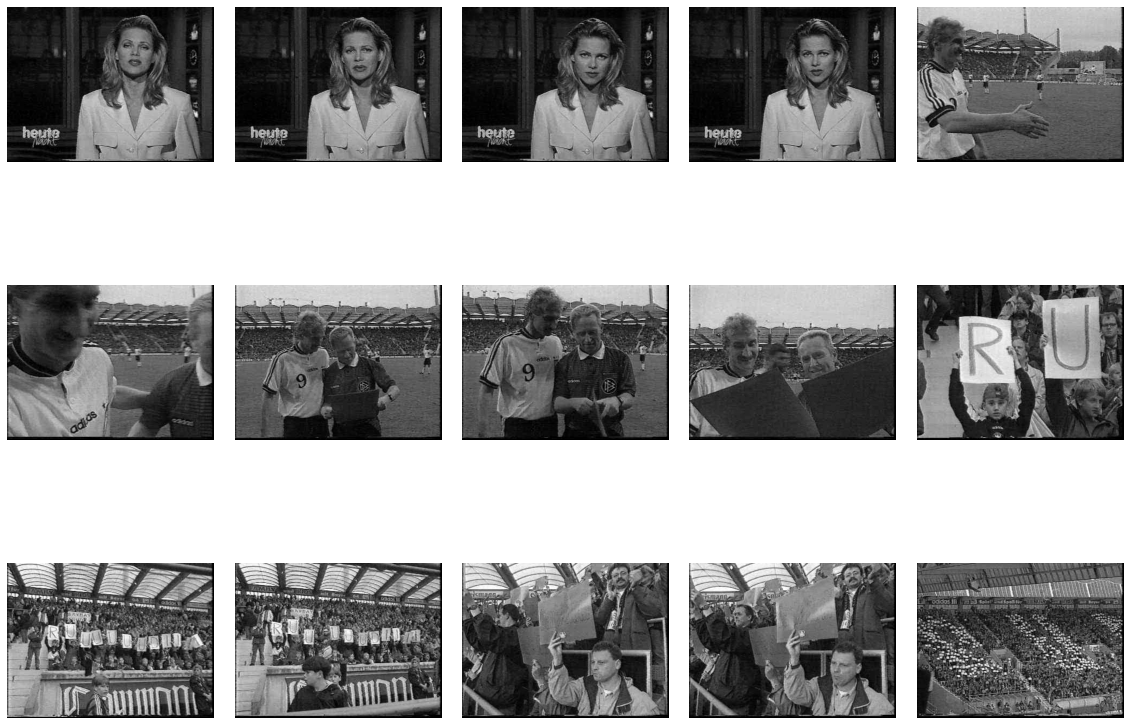

In [7]:
show_frames(frames, 15)

In [8]:
def difference_pixels(frames, threshold=128):
    difference = abs(frames[1:] - frames[:-1])
    metrics = []

    for diff in difference:
        metrics.append(np.where(diff > threshold, 1, 0).sum())

    return metrics


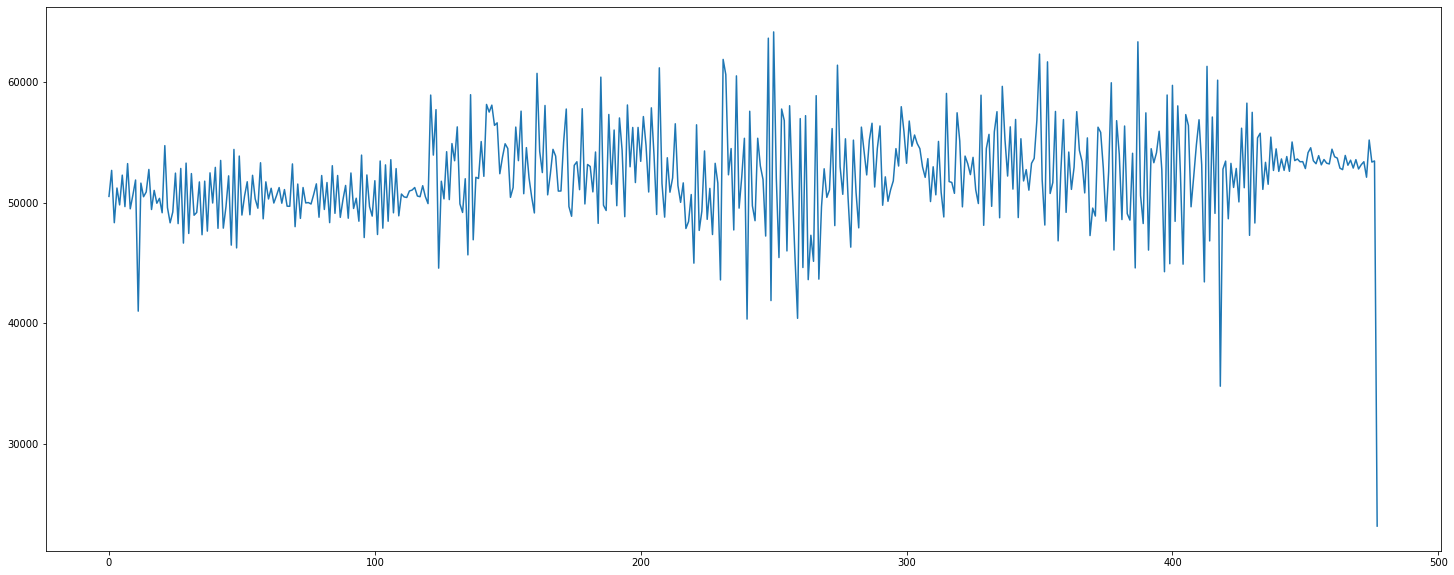

In [9]:
Y = difference_pixels(frames, 128)
X = range(len(Y))

plt.figure(figsize=(25,10))
plt.plot(X, Y)

In [10]:
def difference_blocks(frames, size, threshold=128):
    rows = frames.shape[1]
    cols = frames.shape[2]

    trows = rows // size
    tcols = cols // size

    frames = frames[:, :trows * size, :tcols * size]
    difference = abs(frames[1:] - frames[:-1])

    block_size = size * size

    for diff in difference:
        blocks = diff.reshape(-1, tcols, size).transpose(1,
                                                         0, 2).reshape(-1, block_size)

        for block in blocks:
            a = np.where(block > threshold, 1, 0).sum()
    return diff


In [11]:
difference_blocks(frames, 8)

array([[238, 215, 213, ...,   5,   0,   3],
       [241, 227, 224, ...,   9,   0,   0],
       [243, 241, 238, ...,  13,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)